In [ ]:
#https://github.com/dzvlfi/Python-Credit-Scoring
#https://www.kaggle.com/code/keenoglanville/a-fool-s-complete-guide-to-logistic-regression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

# Import data from csv

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/Tiger/Python-Credit-Scoring/training.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Tiger/Python-Credit-Scoring/testing.csv", delimiter=";")
df_train

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16620,16621,350000.0,1,2,1,56,3,2,2,2500.0,2500.0,2500.0,0.0,0.0,0.0,1
16621,16622,380000.0,2,2,1,60,2,2,2,72557.0,77708.0,79384.0,7000.0,3500.0,0.0,1
16622,16623,340000.0,2,2,1,56,4,3,2,3565.0,3356.0,2758.0,0.0,0.0,22000.0,1
16623,16624,430000.0,1,1,1,61,1,0,0,-1645.0,78379.0,76304.0,85900.0,3409.0,1178.0,1


# Data exploratory

In [5]:
df_train.shape

(16625, 16)

In [6]:
print(df_train.info())
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         16625 non-null  int64  
 1   LIMIT_BAL  16625 non-null  float64
 2   MARRIAGE   16625 non-null  int64  
 3   EDUCATION  16625 non-null  int64  
 4   SEX        16625 non-null  int64  
 5   AGE        16625 non-null  int64  
 6   PAY_1      16625 non-null  int64  
 7   PAY_2      16625 non-null  int64  
 8   PAY_3      16625 non-null  int64  
 9   BILL_AMT1  16625 non-null  float64
 10  BILL_AMT2  16625 non-null  float64
 11  BILL_AMT3  16625 non-null  float64
 12  PAY_AMT1   16625 non-null  float64
 13  PAY_AMT2   16625 non-null  float64
 14  PAY_AMT3   16625 non-null  float64
 15  TARGET     16625 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 2.0 MB
None


ID           16625
LIMIT_BAL       76
MARRIAGE         3
EDUCATION        4
SEX              2
AGE             52
PAY_1            5
PAY_2            5
PAY_3            5
BILL_AMT1    13364
BILL_AMT2    13201
BILL_AMT3    12939
PAY_AMT1      5138
PAY_AMT2      5039
PAY_AMT3      4892
TARGET           2
dtype: int64

In [7]:
numerikal = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3','TARGET']
kategorikal = ['MARRIAGE','EDUCATION','SEX','PAY_1','PAY_2','PAY_3','TARGET']

In [8]:
df_train.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

# Data visualizatoin

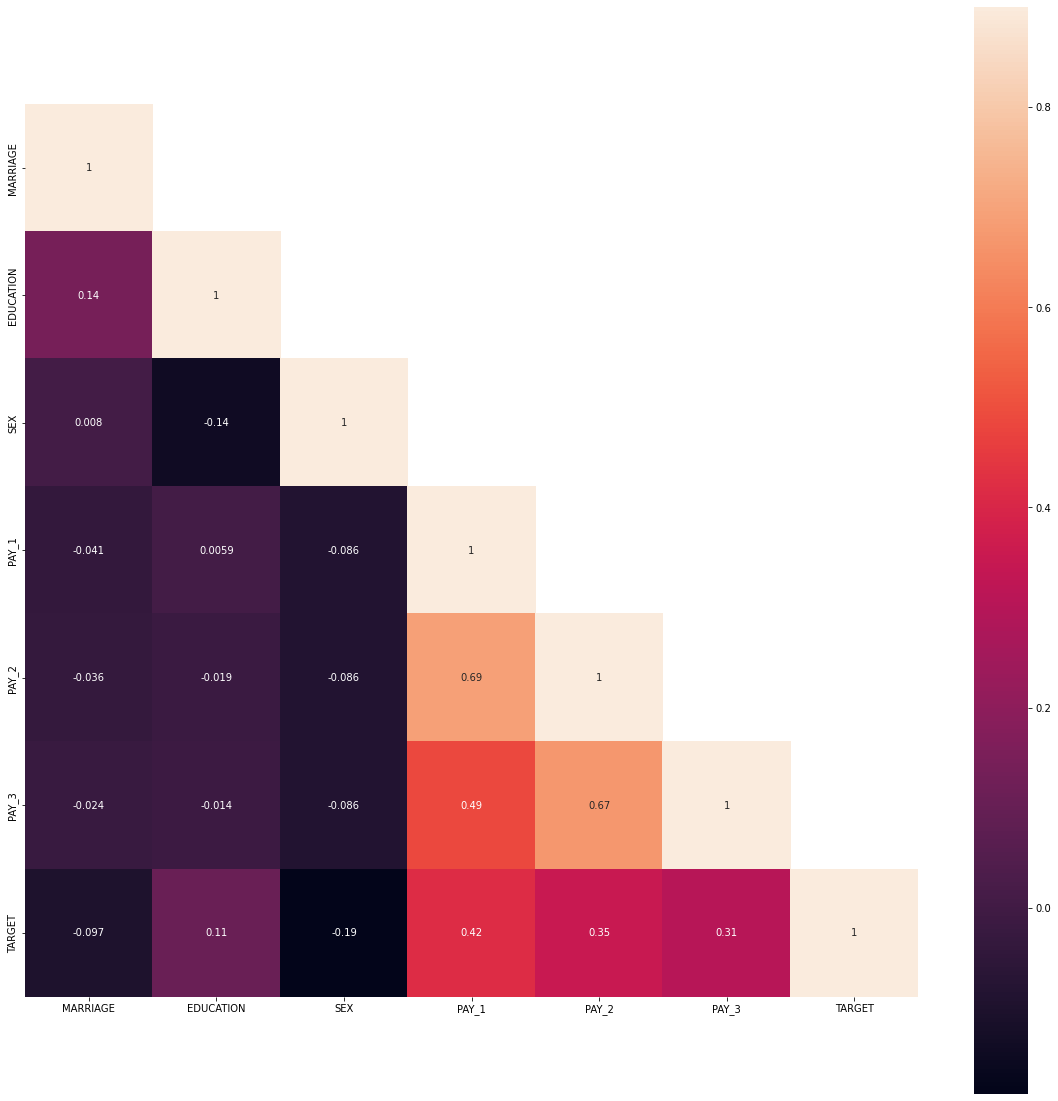

In [9]:
#create correlation with hitmap

#create correlation
#corr = df_train.corr(method = 'pearson')
corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

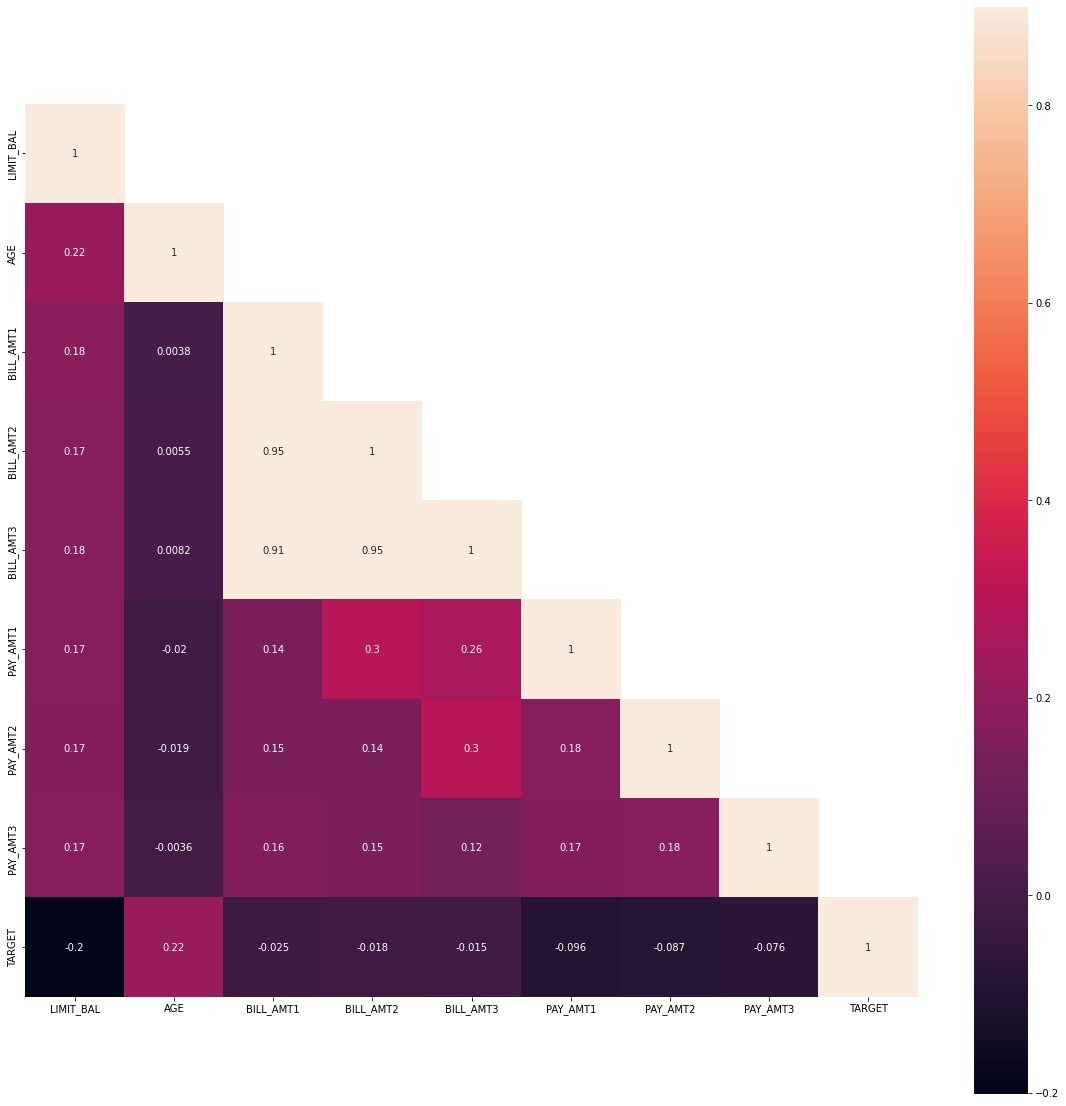

In [10]:
#create correlation with hitmap

#create correlation
corr = df_train[numerikal].corr(method = 'pearson')
#corr = df_train[kategorikal].corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


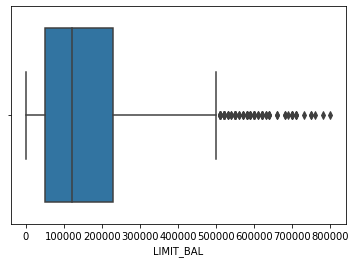

In [11]:
sns.boxplot(df_train["LIMIT_BAL"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


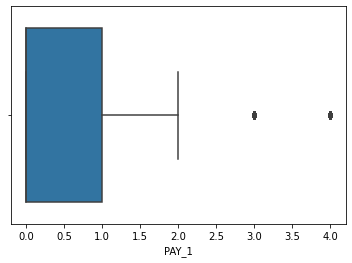

In [12]:
sns.boxplot(df_train["PAY_1"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


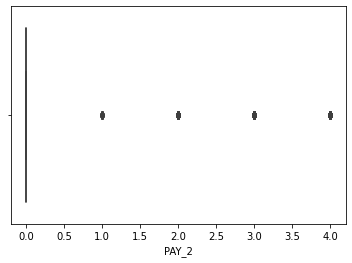

In [13]:
sns.boxplot(df_train["PAY_2"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


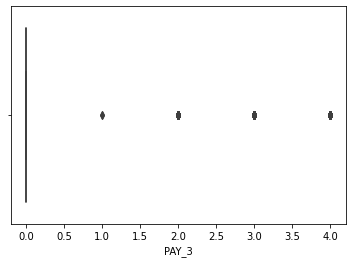

In [14]:
sns.boxplot(df_train["PAY_3"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


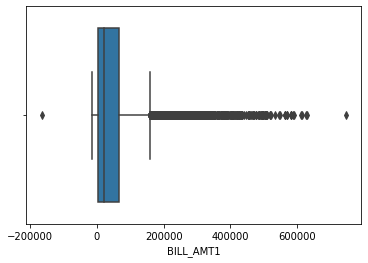

In [15]:
sns.boxplot(df_train["BILL_AMT1"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


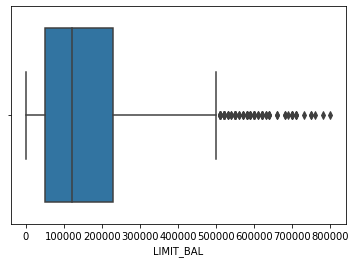

In [16]:
sns.boxplot(df_train['LIMIT_BAL'])

# Drop columns and split the data train

In [17]:
df_cek = df_train[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3","TARGET"]]
df_cek_test = df_test[["LIMIT_BAL","AGE","SEX","EDUCATION","PAY_1","PAY_2","PAY_3"]]

In [18]:
y_trains = df_cek['TARGET']
X_trains = df_cek.drop(columns='TARGET')

In [19]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.33, random_state=42)

# Creating models with data train

## 5. Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [21]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      3318
           1       1.00      0.00      0.00      2169

    accuracy                           0.60      5487
   macro avg       0.80      0.50      0.38      5487
weighted avg       0.76      0.60      0.46      5487

accuracy score:  0.6048842719154365
auc score:  0.5002305209774089


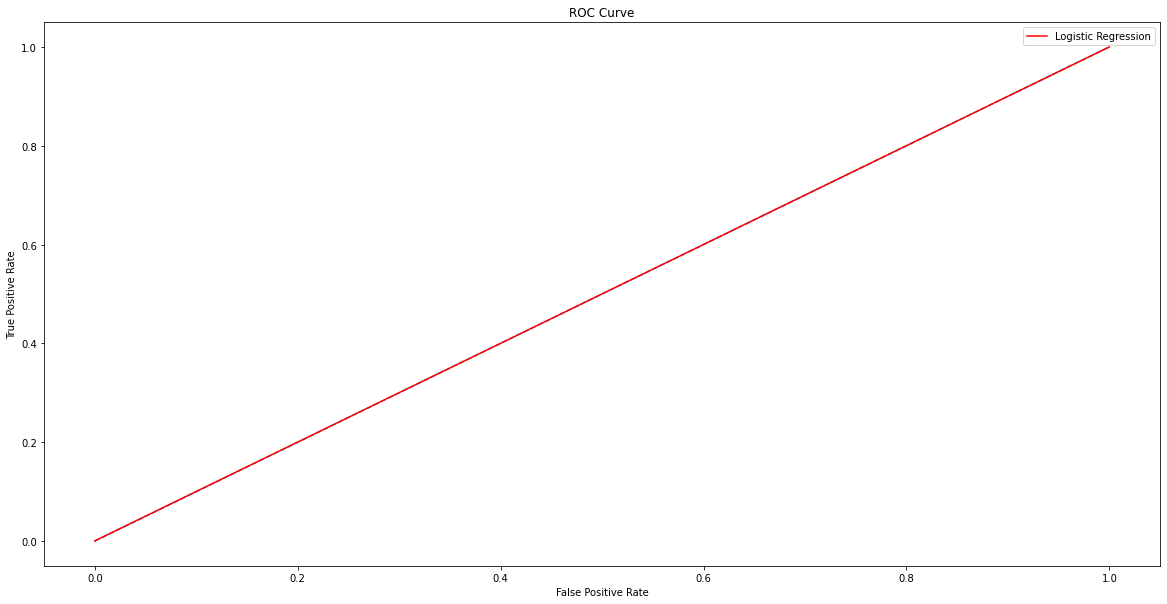

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, color="red", label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [24]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3318
           1       0.80      0.79      0.79      2169

    accuracy                           0.84      5487
   macro avg       0.83      0.83      0.83      5487
weighted avg       0.84      0.84      0.84      5487

accuracy score:  0.8381629305631493
auc score:  0.8293040100645541


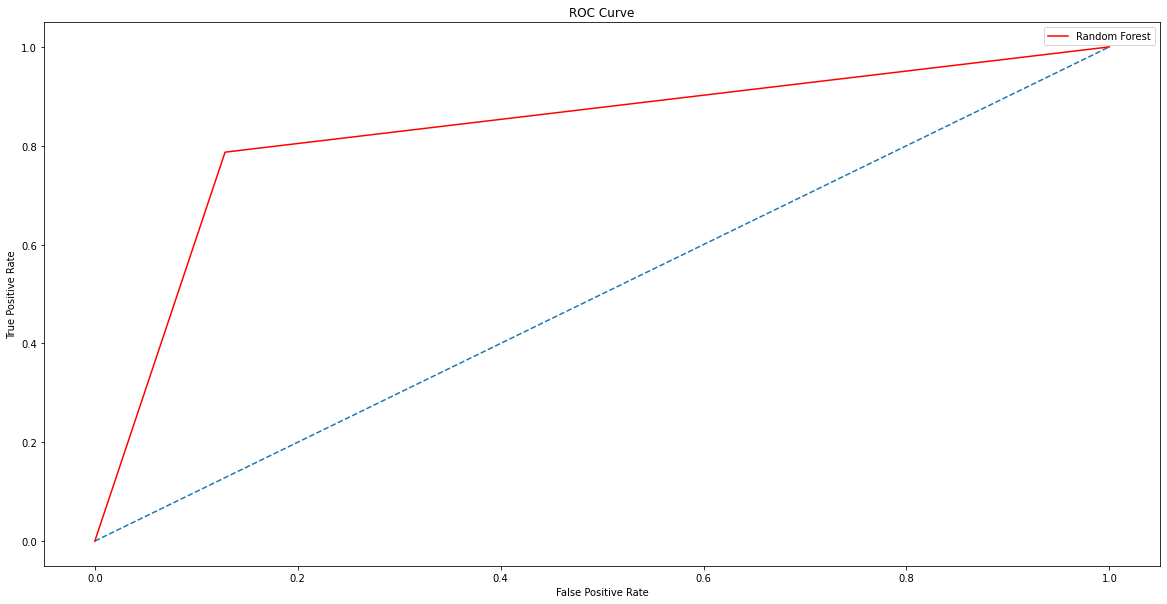

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, color="red", label = "Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

Dikarenakan hasil paling bagus dari compare model adalah random forest dengan auc 0.84, maka model tersebut akan dilakukan tuning paramter pada parameter max_depth

In [26]:
import pickle
filename = '/content/drive/MyDrive/Tiger/Python-Credit-Scoring/rf.pkl'
pickle.dump(clf, open(filename, 'wb'))

# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test) 
result

0.8381629305631493

In [27]:
y_pred = loaded_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

# Hasil klasifikasi

In [28]:
df_test['TARGET'] = pd.Series(y_pred)

In [29]:
df_test['TARGET'].value_counts()

0.0    3354
1.0    2133
Name: TARGET, dtype: int64

In [30]:
df_test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,1.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0.0


In [31]:
df_test.to_csv("/content/drive/MyDrive/Tiger/Python-Credit-Scoring/Hasil Testing Credit Scoring.csv")

In [33]:
X_train.columns

Index(['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3'], dtype='object')

In [44]:
X_train['AGE'].max()

72

In [45]:
!python /content/drive/MyDrive/Tiger/Python-Credit-Scoring/app.py

 * Serving Flask app "app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 221-032-957
